# <center>Лабораторная работа 3.6.1(150А). Спектральный анализ электрических сигналов.</center>

## Введение и краткая теория

Ещё Нютон в далёком 17том веке разлагал изучал солнечный свет. В тёмной комнате он ставил призму вместо окошка и солнечный свет разлагался на кучу разных и проецировался на противоположной стенке. Он назвал это изображениями или спектрами (с латыни). На самом деле, мы так можем делать с любой волной.  
Что же такое спектр в общем случае?

Пусть имеется функция вида $f(t) = \sum\limits_{i=1}^N A_n cos(\omega_n t - \alpha_n)$.
Спектром функции $f$ называется множество пар $(A_i, \omega_i)$
В этой работе предлагается исследовать спектры периодической последовательности прямоугольных импульсов, спектры периодической последовательности цугов грамоническисх колебаний и спектров гармонических колебаний, модулированных по частоте.

In [1]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [3]:
def chart(file, name = ''):
    # Строим график
    fig = plt.figure(figsize=(10, 6))  # (Размер графика)
    plt.title(name, fontsize=16)

    plt.xlabel('Частота, кГц', fontdict=dict(size=12))
    plt.ylabel('Амплитуда, В', fontdict=dict(size=12))
    
    x = np.array(file[file.columns[0]])  
    y = np.array(file[file.columns[1]])
    plt.plot(x,y)
    plt.show()

## Исследование спектра периодической последовательности прямоугольных импульсов.

Будем пускать последовательность прямоугольных импульсов. Потом проанализируем, как меняется спектр при увеличении длительности сингала в два раза, а потм при увеличении частоты в два раза.

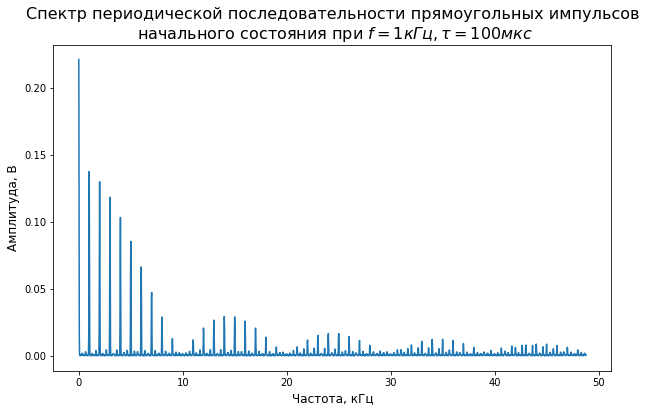

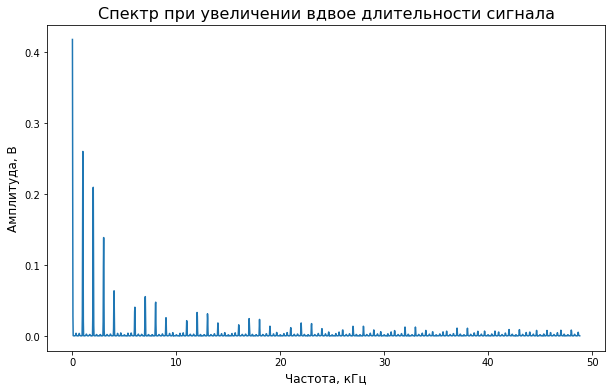

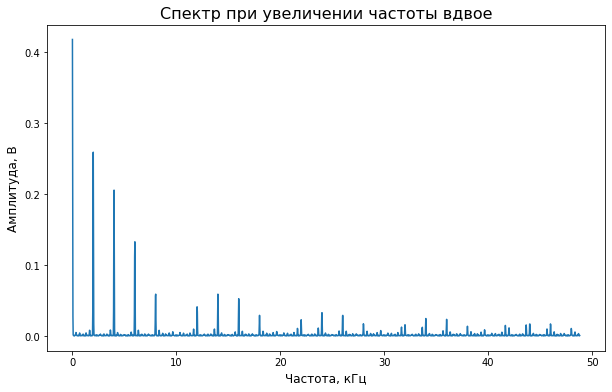

In [4]:
begin_state = open_csv('BeginState.csv')
freqX2 = open_csv('FrequencyX2.csv')
timeX2 = open_csv('TimeX2.csv')
chart(begin_state, 'Спектр периодической последовательности прямоугольных импульсов\n начального состояния при $f=1кГц, \\tau = 100мкс$')
chart(timeX2, 'Спектр при увеличении вдвое длительности сигнала')
chart(freqX2, 'Спектр при увеличении частоты вдвое')

По графикам видно, что при увеличении вдвое длительности сигнала, у нас в два раза уменьшается $\Delta \nu$ (то есть расстояние между минимумами, ширина спектра). А при увеличении частоты в два раза у нас в два раза увеличивается $\delta \nu$ (то есть расстояние между соседними частотами в спектре), что, в принципе, логично.

Теперь исследуем зависимость ширины спектра $\Delta \nu$ от длительности
импульса $\tau$ (при $f = $ 1кГц)

In [5]:
# Вычисление ширины спектра
def spectrum_width(file):
    y = np.array(file[file.columns[1]])
    x = np.array(file[file.columns[0]])
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amin_index = 0
    Amax = y[Amax_index]
    for i in range(Amax_index + 1, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 2::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i, len(y)) if y[j] == current_max][0]
            break
            
    delta = abs(Amin_index - Amax_index)
    for i in range(Amax_index + 1, len(y), 2*delta):
        current_max = y[i::].max()
        next_max = y[i + delta::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i + delta, len(y)) if y[j] == current_max][0]
            break
    return abs(x[Amin_index] - x[Amax_index])
    

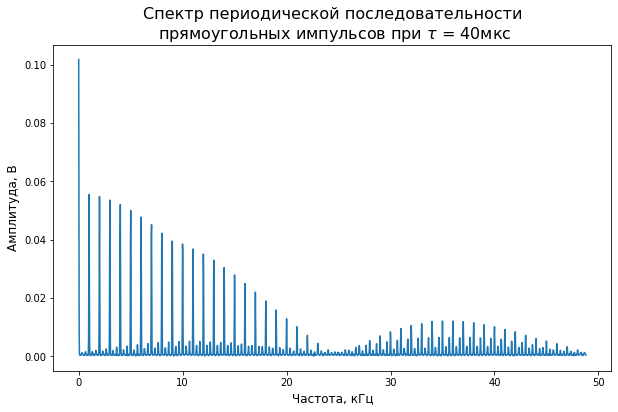

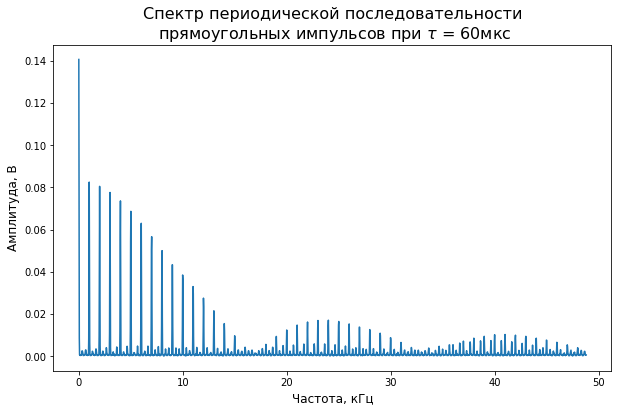

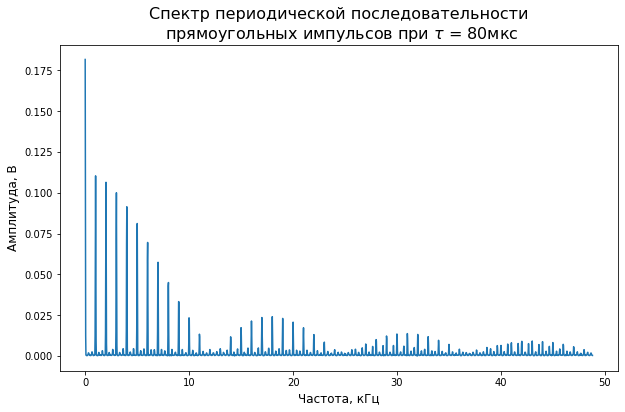

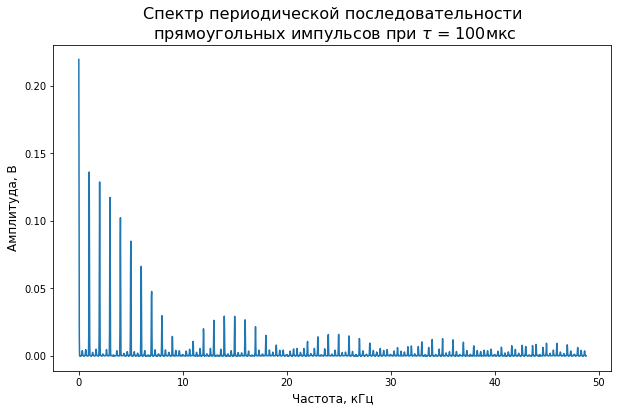

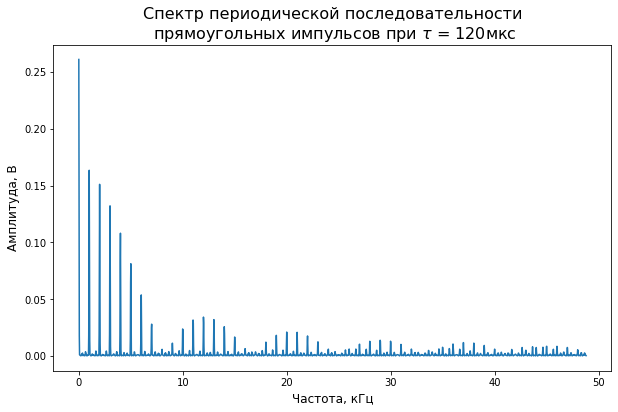

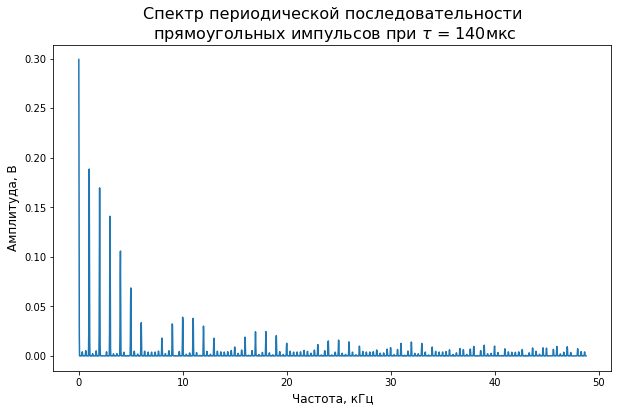

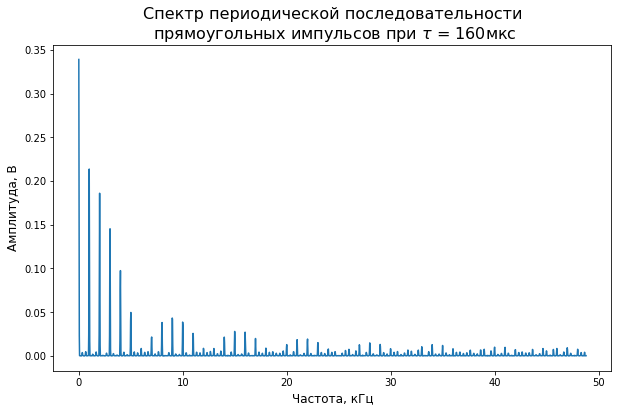

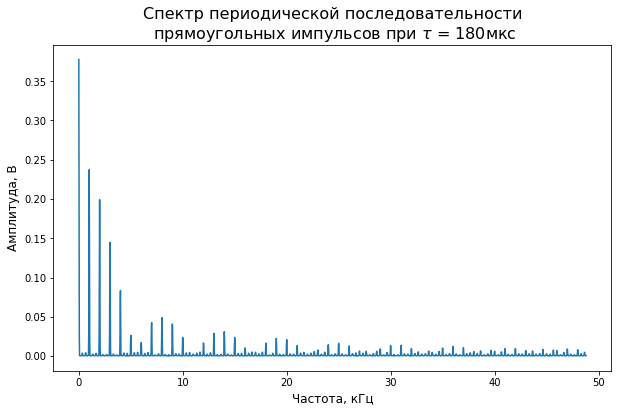

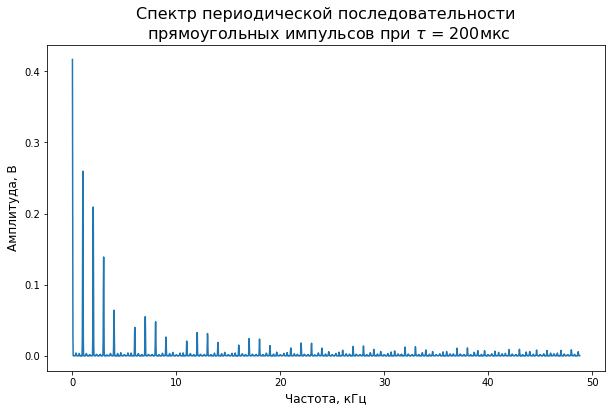

In [6]:
# Выведем все графики
s = 40
frequency = list()
t = list()  # тут будет время сигнала для каждого случая
while s <= 200:
    current = open_csv('point_8/{}us.csv'.format(s))
    chart(current, 'Спектр периодической последовательности\n прямоугольных импульсов при $\\tau$ = {}мкс'.format(s))
    frequency.append(spectrum_width(current))
    t.append(s)
    s += 20

Результаты занесём в таблицу

In [7]:
table = {r"$\tau, \mu s$": pd.Series(t), r"$\Delta\nu$, kGz": pd.Series(frequency)}
table = pd.DataFrame(table)
table

,"$\tau, \mu s$","$\Delta\nu$, kGz"
0,40,34.999847
1,60,24.008751
2,80,18.000603
3,100,13.995171
4,120,11.992455
5,140,9.989738
6,160,8.988380
7,180,8.010864
8,200,7.009506


Теперь построим график зависимости $\Delta \nu (\large \frac{1}{\tau})$.

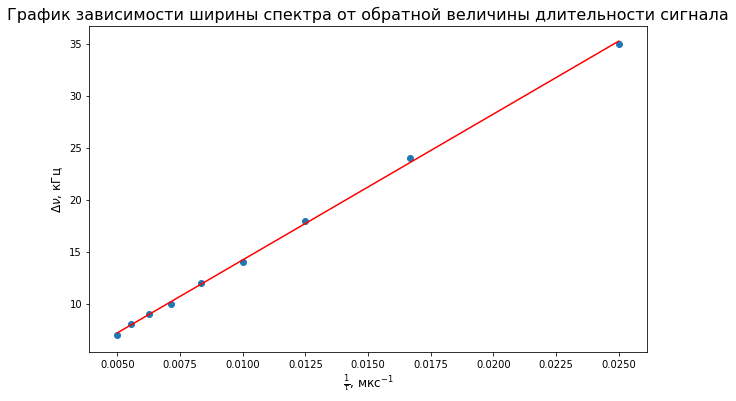

In [8]:
x = np.array([np.float64(1/a) for a in t])
y = np.array(frequency)
# Строим график
fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('График зависимости ширины спектра от обратной величины длительности сигнала', fontsize=16)

plt.xlabel(r'$ \frac{1}{\tau}$, мкс$^{-1}$', fontdict=dict(size=12))
plt.ylabel(r'$\Delta \nu$, кГц', fontdict=dict(size=12))

# Точки для линейной экстраполяции
x_for_extr = x
y_for_extr = y
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(x_for_extr.min(), x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член

# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r')
plt.scatter(x,y)
plt.show()

In [9]:
print('Коэффициент наколна ~', (a*0.001).round(1), 'Гц*с')

Коэффициент наколна ~ 1.4 Гц*с


Из графика найдем коэффициент наклона $k = 1.4$, что в очередной раз убеждает нас в справедливости соотношения неопределённости $\Delta \nu \Delta t \approx 1$

Теперь для $\tau =$ 50 мкс и $\tau =$ 100 мкс при частотке $f =$ 1кГц измерим частоты и амплитуды спектральных составляющих сигнала и запишем в таблицы

In [10]:
us100 = open_csv('point_9/100us.csv')
us50 = open_csv('point_9/50us.csv')

x1 = np.array(us100[us100.columns[0]])
y1 = np.array(us100[us100.columns[1]])

ampl1 = [0.2205876, 0.02083885, 0.01628252, 0.01136647, 0.00849535]
f1 = []
for i in ampl1:
    a = [x for (x, y) in list(zip(x1, y1)) if y == i]
    f1.append(a[0])
table1 = pd.DataFrame({'Частота, кГц': pd.Series(f1), 'Амплитуда, В': pd.Series(ampl1)})
table1

,"Частота, кГц","Амплитуда, В"
0,0.000000,0.220588
1,15.020370,0.020839
2,25.010109,0.016283
3,36.001205,0.011366
4,45.013428,0.008495


In [11]:
x2 = np.array(us50[us50.columns[0]])
y2 = np.array(us50[us50.columns[1]])

ampl2 = [y2[0], 0.01445985, 0.00879789]
f2 = []
for i in ampl2:
    a = [x for (x, y) in list(zip(x2, y2)) if y == i]
    f2.append(a[0])
table2 = pd.DataFrame({'Частота, кГц': pd.Series(f2), 'Амплитуда, В': pd.Series(ampl2)})
table2

,"Частота, кГц","Амплитуда, В"
0,0.000000,0.121567
1,29.993057,0.014460
2,48.661232,0.008798


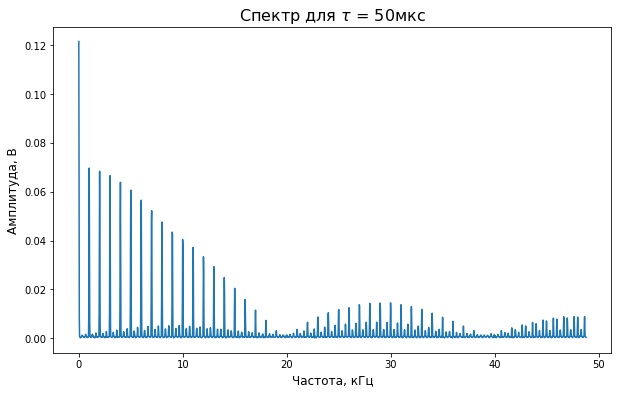

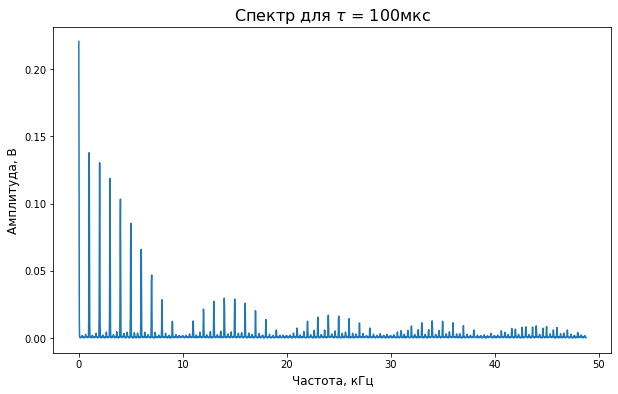

In [12]:
chart(us50, 'Спектр для $\\tau$ = 50мкс')
chart(us100, 'Спектр для $\\tau$ = 100мкс') 

## Исследование спектра периодической последовательности цугов гармонических колебаний

Исследуем, как изменяется вид спектра при увеличении длительности импульса вдвое от 100 мкс до 200 мкс

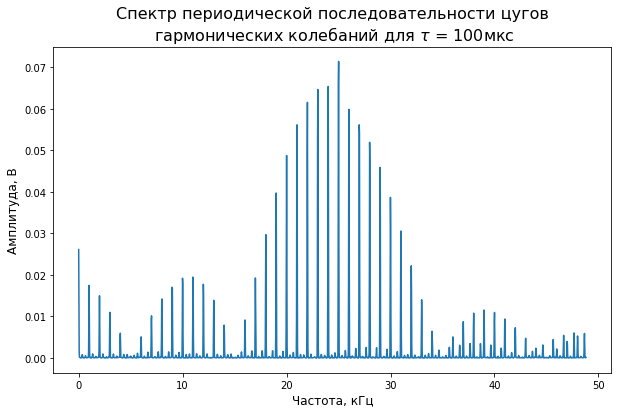

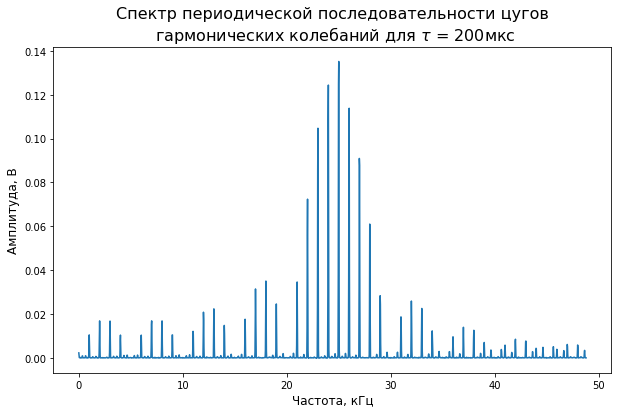

In [13]:
#пункт 16
us100 = open_csv('point_16/100us.csv')
us200 = open_csv('point_16/200us.csv')

chart(us100, 'Спектр периодической последовательности цугов\n гармонических колебаний для $\\tau$ = 100мкс')
chart(us200, 'Спектр периодической последовательности цугов\n гармонических колебаний для $\\tau$ = 200мкс')


Из графиков видно, что при увеличении длительности сигнала в два раза ширина спектра уменьшается в два раза

Посмотрим, как меняется картинка спектра при изменении несущей частоты генератора.

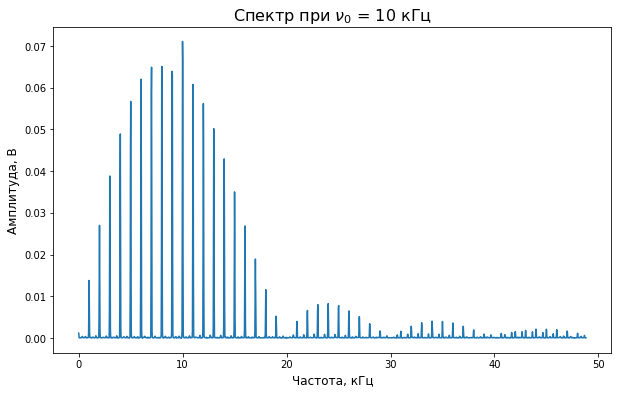

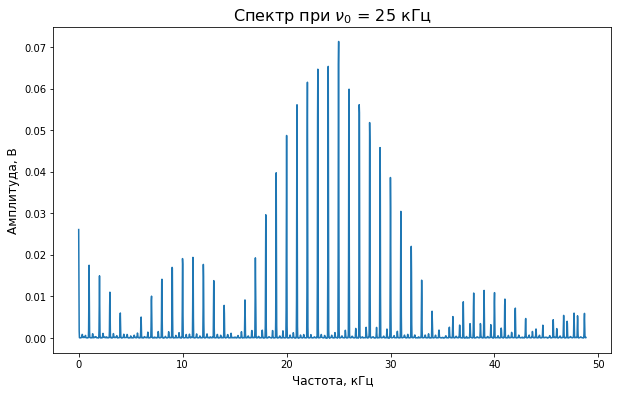

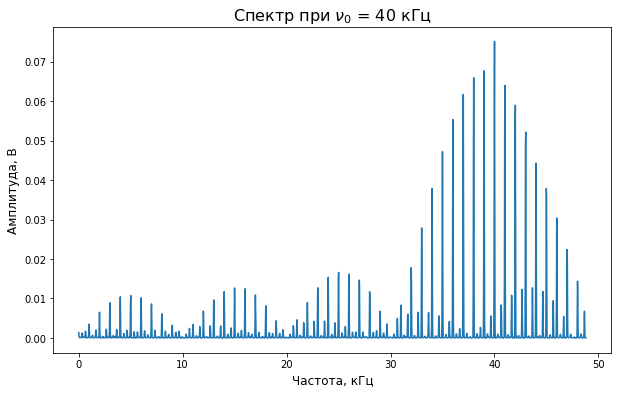

In [14]:
#пункт 17
kGz10 = open_csv('point_17/10kGz.csv')
kGz25 = open_csv('point_17/25kGz.csv')
kGz40 = open_csv('point_17/40kGz.csv')

chart(kGz10, r'Спектр при $\nu_0$ = 10 кГц')
chart(kGz25, r'Спектр при $\nu_0$ = 25 кГц')
chart(kGz40, r'Спектр при $\nu_0$ = 40 кГц')


Как видим, несущая частота определяет положение максимума.

Определим расстояние $\delta \nu$ между соседними спектральными компонентами для разных частот повторения импульсов.

In [15]:
# Функция, которая считает разность соседних частот
def find_delta(file):
    y = np.array(file[file.columns[1]])
    x = np.array(file[file.columns[0]])
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amin_index = 0
    Amax = y[Amax_index]
    for i in range(Amax_index, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 2::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i, len(y)) if y[j] == current_max][0]
            break
    return abs(x[Amin_index] - x[Amax_index])

In [16]:
s = 1
frequency = list()
f = list()

current = open_csv('point_18/0,5kGz.csv')

frequency.append(find_delta(current))
f.append(0.5)

while s <= 5:
    current = open_csv('point_18/{}kGz.csv'.format(s))
    frequency.append(find_delta(current))
    f.append(s)
    if s == 2:
        s = s + 1
    s = s + 1
table = {r"$f, kGz$": pd.Series(f), r"$\delta\nu$, kGz": pd.Series(frequency)}
table = pd.DataFrame(table)
table

,"$f, kGz$","$\delta\nu$, kGz"
0,0.5,0.500679
1,1.0,1.001358
2,2.0,2.002716
3,4.0,4.005432
4,5.0,5.006790


А теперь давайте построим график $\delta \nu (f)$

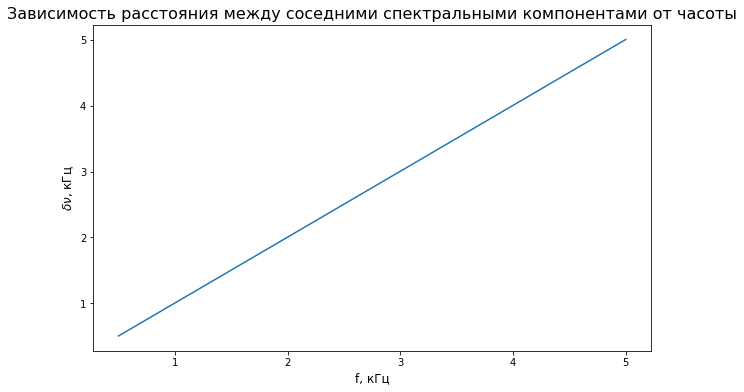

In [17]:
#пункт 20
x = np.array(table[table.columns[0]])
y = np.array(table[table.columns[1]])

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Зависимость расстояния между соседними спектральными компонентами от часоты', fontsize=16)

plt.xlabel('f, кГц', fontdict=dict(size=12))
plt.ylabel(r'$\delta \nu$, кГц', fontdict=dict(size=12))

plt.plot(x, y)
plt.show()

Видно, что угловой коэффициент примерно равен единице, что сходится с теоретическим значением

## Исследование спектра гармонических сигналов, модулированных по амплитуде
Будем подавать на канал $CH2$ неизменяющийся синусоидальных сигнал, а на $CH1$ тоже синусоидальный, но его амплитуду мы будем менять.  
Зная, что $A_{осн} = A_0$ и $A_{бок} =\large \frac{A_0 m}{2}$
Для каждого случая найдём m. И далее зная, что $A_{min} = A_0(1 - m)$, а $A_{max} = A_0(1 + m)$, мы сможем найти $A_{max}$ и $A_{min}$.

In [18]:
# Функция, которая будет давать A_min и A_max по графику
def find_Amax_Amin(filename):
    file = open_csv(filename)
    y = np.array(file[file.columns[1]])
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amax = y[Amax_index]
    for i in range(Amax_index, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 2::].max()
        if (current_max == next_max):
            Amin = current_max
            break
    return (Amin, Amax)


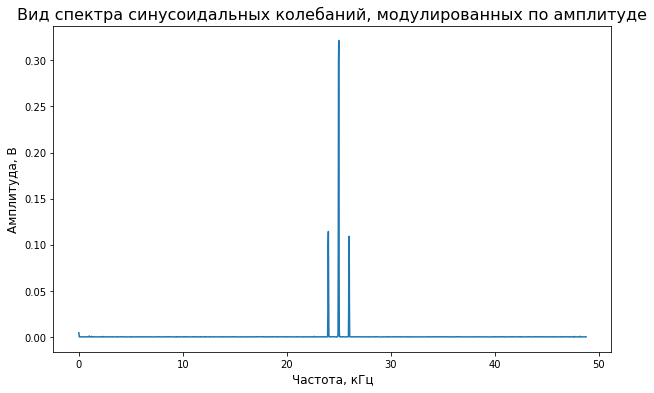

In [19]:
# Найдём минимальную и максимальную частоту для каждого случая
filenames = ['0,2','0,5', '0,8', '1,1', '1,4', '1,7', '2']
Amax_arr = []
Amin_arr = []
m = []
for i in filenames:
    Aside, Acenter = find_Amax_Amin('point_26/{}V.csv'.format(i))
    current_m = 2*Aside/Acenter
    Amin = Acenter*(1-current_m)
    Amax = Acenter*(1+current_m)
    m.append(current_m.round(3))
    Amin_arr.append(Amin.round(3))
    Amax_arr.append(Amax.round(3))

# Выглядит для каждого это примерно так
a = open_csv('point_26/{}V.csv'.format(filenames[4]))
chart(a, 'Вид спектра синусоидальных колебаний, модулированных по амплитуде')

In [20]:
for i in range(len(m)):
    print('Для амплитуды', filenames[i]+'В:', 'm =', m[i], 'A_min =', Amin_arr[i], 'A_max =', Amax_arr[i])

Для амплитуды 0,2В: m = 0.097 A_min = 0.29 A_max = 0.352
Для амплитуды 0,5В: m = 0.243 A_min = 0.243 A_max = 0.399
Для амплитуды 0,8В: m = 0.385 A_min = 0.198 A_max = 0.445
Для амплитуды 1,1В: m = 0.53 A_min = 0.151 A_max = 0.493
Для амплитуды 1,4В: m = 0.679 A_min = 0.103 A_max = 0.54
Для амплитуды 1,7В: m = 0.822 A_min = 0.057 A_max = 0.587
Для амплитуды 2В: m = 0.995 A_min = 0.002 A_max = 0.628


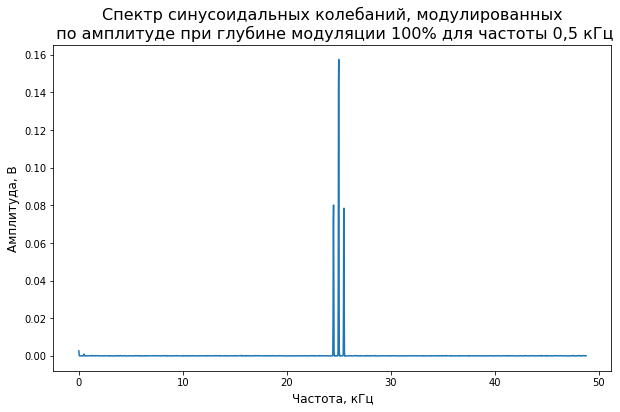

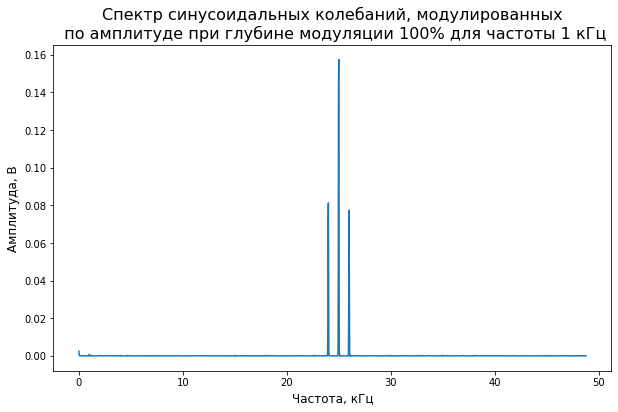

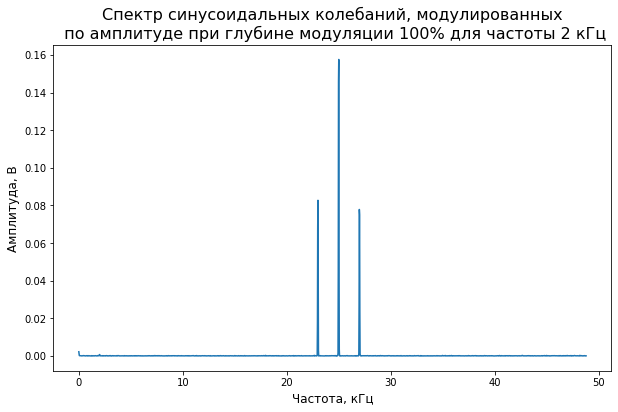

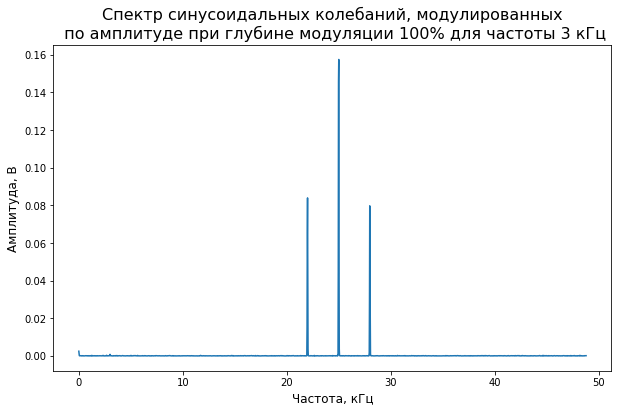

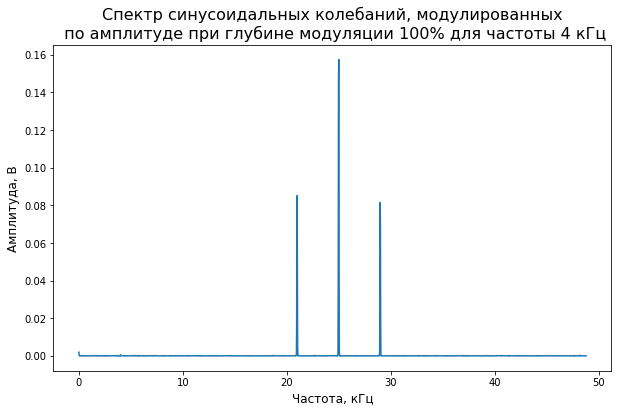

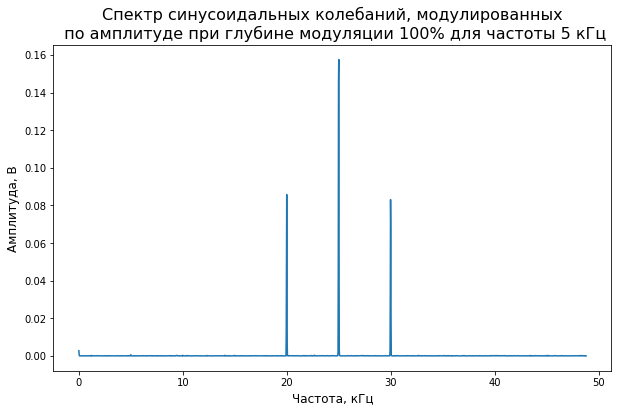

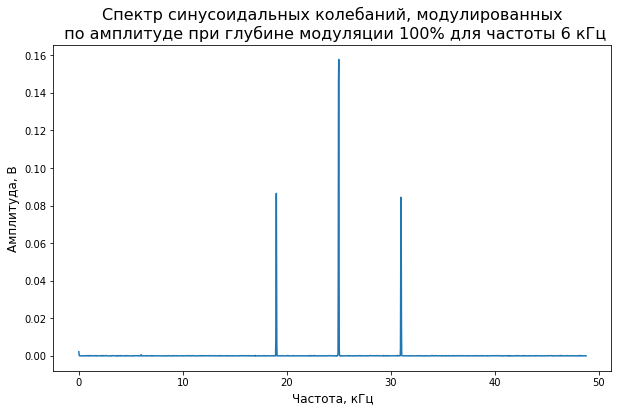

In [21]:
filenames = ['0,5','1', '2', '3', '4', '5', '6']
for i in filenames:
    a = open_csv('point_27/{}kGz.csv'.format(i))
    chart(a, 'Спектр синусоидальных колебаний, модулированных\n по амплитуде при глубине модуляции 100% для частоты {} кГц'.format(i))


Как мы видим, отношение $A_{осн}$ и $A_{бок}$ сохраняются, но расстояние между ними увеличивается. Оно и понятно, потому что мы увеличивали частоту $\Omega$, отвечающую за колебания амплитуды. Из графиков даже видно, что отношения ширины и отношения $\Omega$ примерно совпадают

## Исследование спектра гармонических сигналов, модулированных по частоте

In [22]:
# Функция, которая будет давать A_min и A_max по графику
def find_Amax_Amin_F(filename):
    file = open_csv(filename)
    y = np.array(file[file.columns[1]])[1000::]
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amin_index = 0
    Amax = y[Amax_index]
    for i in range(Amax_index + 1, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 1::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = i
            break
    return (Amin_index + 1000, Amax_index+ 1000)

In [23]:
bettas = []
Amin_arr = []
Amax_arr = []

filenames = ['100','200', '300', '400', '500', '600', '700', '800', '900', '1k']
deviations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for i in filenames:
    a = open_csv('point_32/{}Gz.csv'.format(i))
    #chart(a, 'Спектр govna'.format(i))

j = 0
for i in filenames:
    file = open_csv('point_32/{}Gz.csv'.format(i))
    
    y = np.array(file[file.columns[1]])
    x = np.array(file[file.columns[0]])
    
    Amin_index, Amax_index = find_Amax_Amin_F('point_32/{}Gz.csv'.format(i))
    
    delta = x[Amin_index] - x[Amax_index]
    F = delta
    Amin = y[Amin_index]
    Amax = y[Amax_index]
    #betta = 2*Amin/Amax # СЮДА НОРМ ФОРМУЛУЛУЛЛУ
    betta = 0.001*deviations[j]/F
    Amin_arr.append(Amin)
    Amax_arr.append(Amax)
    bettas.append(betta.round(3))
    j += 1
bettas
# Опять хрень, потому что непонятно, по какой формуле считать betta
# Дальше всё сделаю, тут просто правильную формулу для betta  всё будет норм

[1.398, 4.194, 6.291, 8.389, 10.486, 12.583, 14.68, 16.777, 18.874, 41.943]

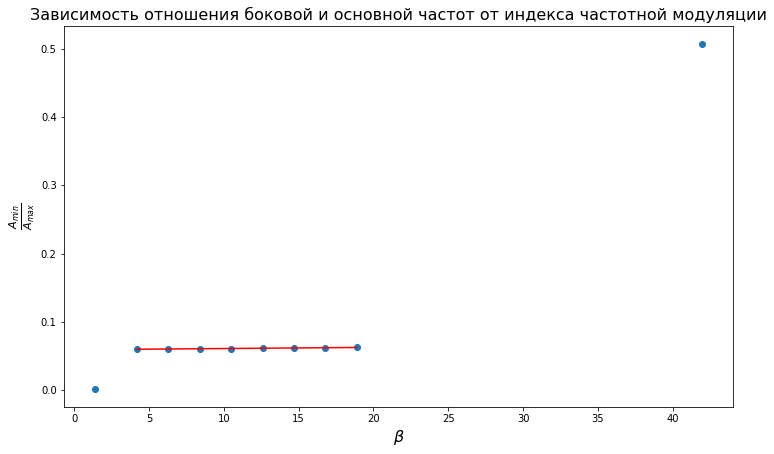

In [24]:
# Построим график отношения А_1/А_0 в зависимости от betta.

fig = plt.figure(figsize=(12, 7))  # (Размер графика)
plt.title('Зависимость отношения боковой и основной частот от индекса частотной модуляции', fontsize=16)
plt.xlabel('$\\beta$', fontdict=dict(size=16))
plt.ylabel('$\\frac{A_{min}}{A_{max}}$', fontdict=dict(size=16))

y = np.array([i/j for i,j in zip(Amin_arr, Amax_arr)])
x = np.array(bettas)

# Точки для линейной экстраполяции
x_for_extr = x[1:-1]
y_for_extr = y[1:-1]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(x_for_extr.min(), x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член

# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r')

plt.scatter(x,y)
plt.show()

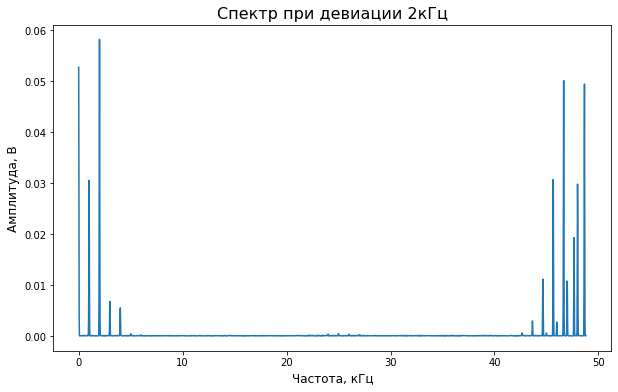

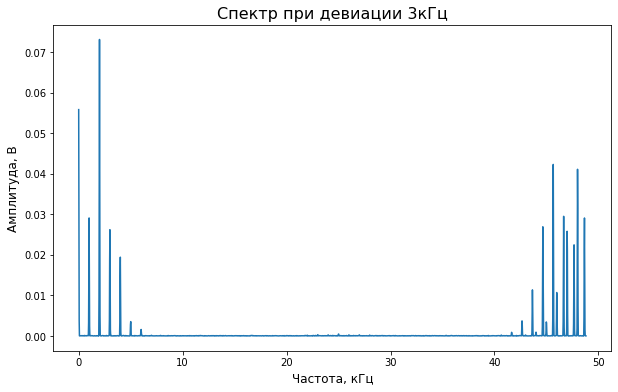

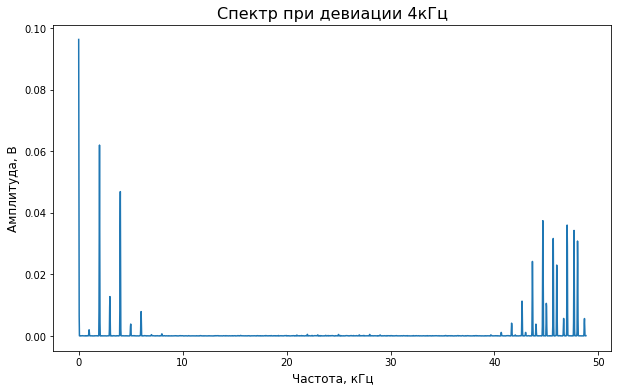

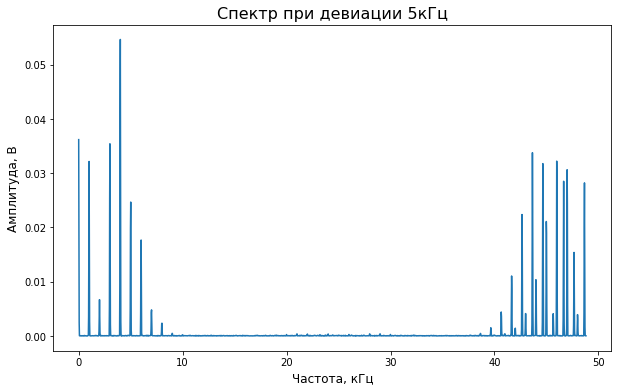

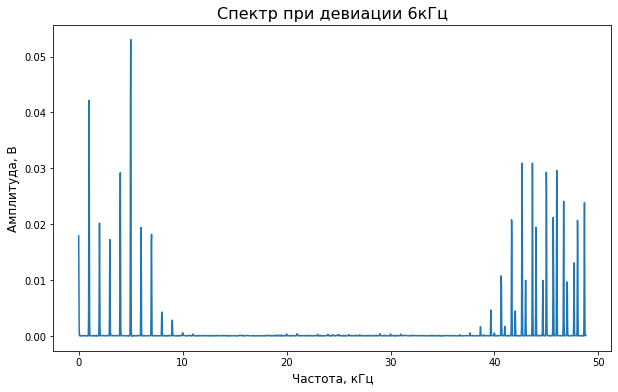

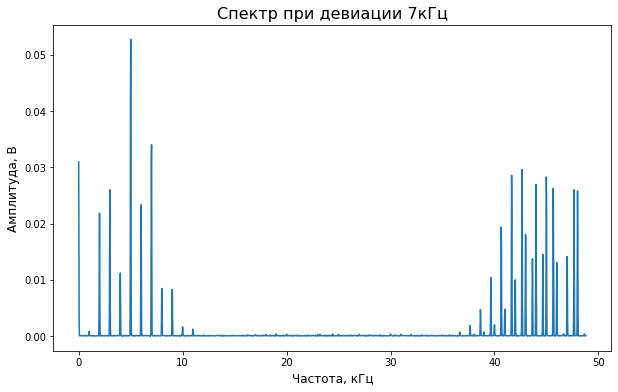

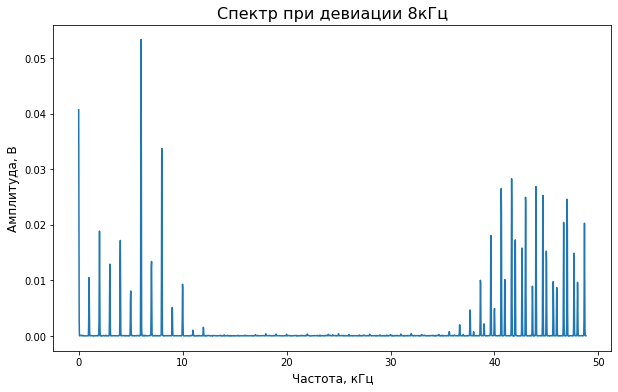

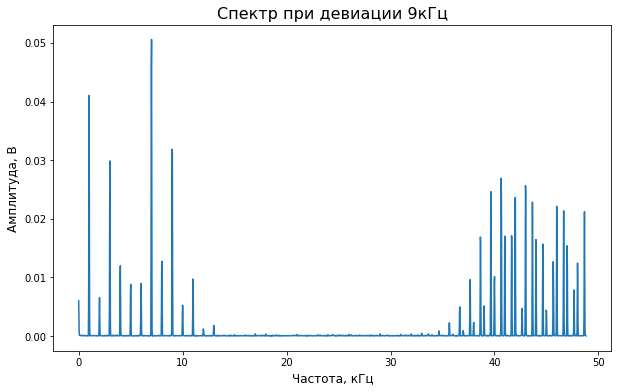

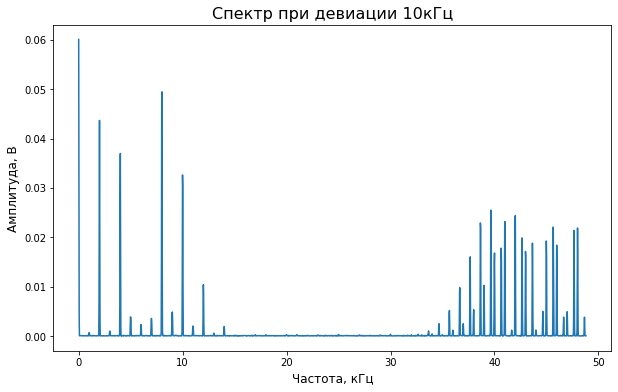

In [25]:
# Теперь посмотрим, как там оно идёт дальше при увеличении девиации

filenames = ['2','3', '4', '5', '6', '7', '8', '9', '10']
for i in filenames:
    a = open_csv('point_33/{}kGz.csv'.format(i))
    chart(a, 'Спектр при девиации {}кГц'.format(i))

## Результаты и выводы

Мы поизучали спектры различных сигналов и нам очень понравилось

Лабораторная работа подготовлена студентами ФПМИ.Индустрия(ФИВТ!), в составе: Потяшин Иван, Ярлыков Илья. Группа Б05-814, 25.10.2019